In [1]:
from manifold_learning import IMD
from FastCCM import CCM
import numpy as np
from pydmd import DMD, BOPDMD
from manifold_learning.utils import utils
from sklearn.decomposition import PCA
from pydmd.preprocessing import zero_mean_preprocessing
from pydmd.plotter import plot_summary
from manifold_learning.data.data_loader import load_csv_dataset,get_truncated_lorenz_rand
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import imageio
import os
import tempfile
import importlib

In [2]:
X = load_csv_dataset("Jan1023_1_fr_ma2sec_sr30.csv").to_numpy()[:,1:]
X = StandardScaler().fit_transform(X)

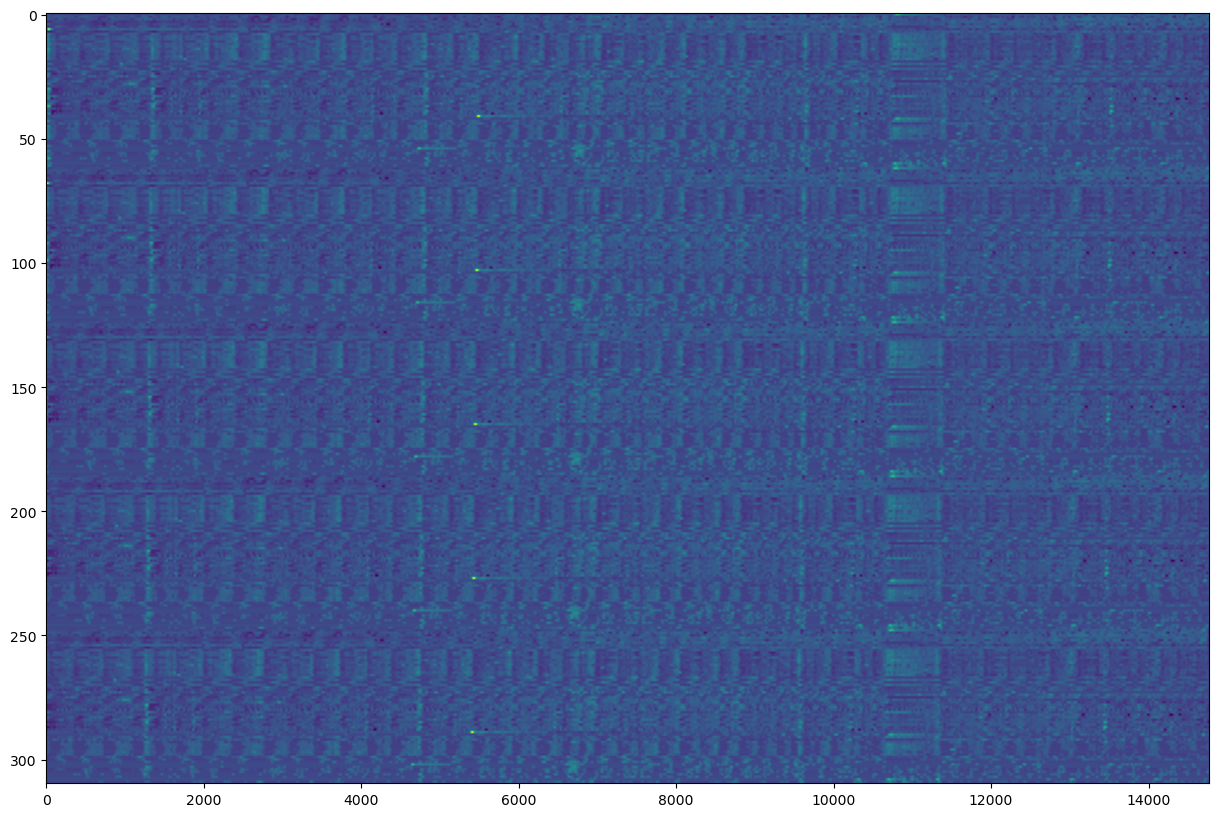

In [18]:
plt.figure(figsize=(15,10))
plt.imshow(X.T,aspect="auto")

In [4]:
X = utils.get_td_embedding_np(X,5,20).reshape(-1,5*X.shape[1])


In [68]:
trainer = IMD.IMD_nD(X.shape[1], embed_dim=5, n_components=5,subtract_corr=True, device="cuda")

In [81]:
trainer.fit(X, sample_len=600, library_len=2000, 
            exclusion_rad=30, nbrs_num=30, tp=90, 
            epochs=1500, num_batches=1,optimizer="RMSprop", learning_rate=0.0003,tp_policy="range")


Epoch 1/1500, Loss: 1.0423
Epoch 2/1500, Loss: 1.1774
Epoch 3/1500, Loss: 1.0813
Epoch 4/1500, Loss: 1.0772
Epoch 5/1500, Loss: 1.0950
Epoch 6/1500, Loss: 1.0704
Epoch 7/1500, Loss: 1.0576
Epoch 8/1500, Loss: 1.0576
Epoch 9/1500, Loss: 1.0536
Epoch 10/1500, Loss: 1.0505
Epoch 11/1500, Loss: 1.0481
Epoch 12/1500, Loss: 1.0402
Epoch 13/1500, Loss: 1.0237
Epoch 14/1500, Loss: 1.0139
Epoch 15/1500, Loss: 1.0319
Epoch 16/1500, Loss: 1.0178
Epoch 17/1500, Loss: 1.0255
Epoch 18/1500, Loss: 1.0104
Epoch 19/1500, Loss: 1.0190
Epoch 20/1500, Loss: 1.0122
Epoch 21/1500, Loss: 1.0148
Epoch 22/1500, Loss: 1.0245
Epoch 23/1500, Loss: 1.0185
Epoch 24/1500, Loss: 1.0297
Epoch 25/1500, Loss: 1.0210
Epoch 26/1500, Loss: 1.0158
Epoch 27/1500, Loss: 1.0076
Epoch 28/1500, Loss: 1.0244
Epoch 29/1500, Loss: 1.0079
Epoch 30/1500, Loss: 1.0065
Epoch 31/1500, Loss: 1.0076
Epoch 32/1500, Loss: 1.0145
Epoch 33/1500, Loss: 1.0090
Epoch 34/1500, Loss: 1.0014
Epoch 35/1500, Loss: 1.0239
Epoch 36/1500, Loss: 1.0071
E

KeyboardInterrupt: 

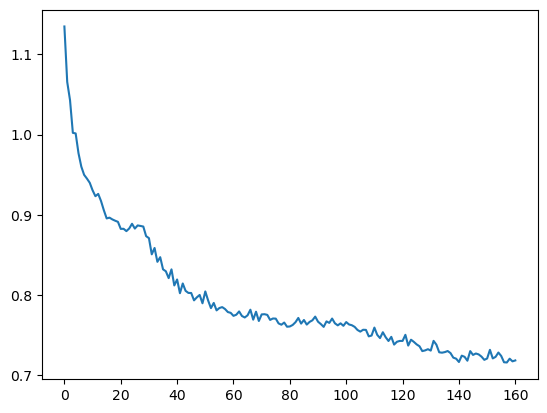

In [10]:
plt.plot(trainer.get_loss_history()[:])


In [11]:

unmixed = trainer.predict(X)

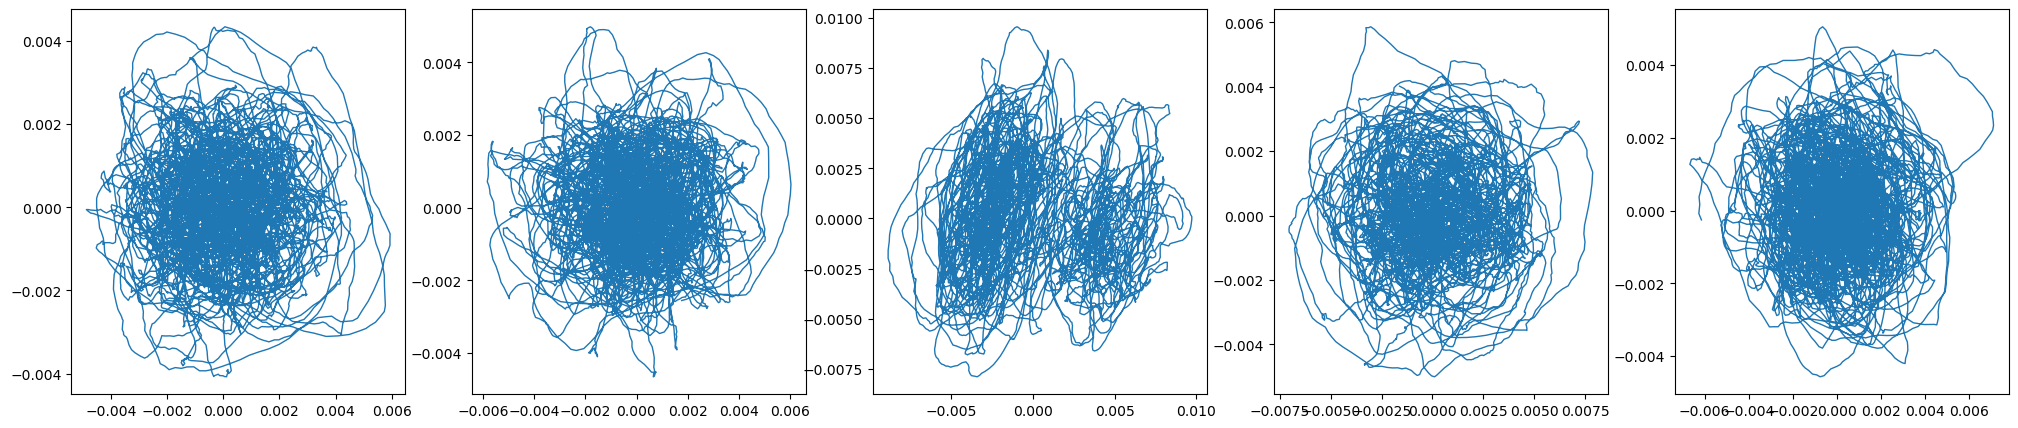

In [84]:
plt.figure(figsize=(5*unmixed.shape[1],5))
for i in range(unmixed.shape[1]):
    plt.subplot(1,unmixed.shape[1],i+1)
    x_pca = PCA(2).fit_transform(unmixed[:,i,:])
    plt.plot(x_pca[:,0],x_pca[:,1],linewidth=1)

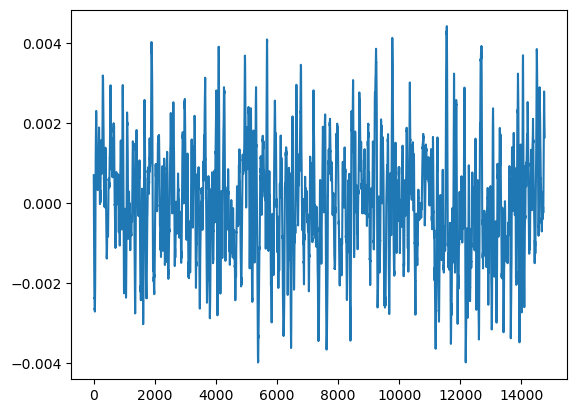

In [85]:
plt.plot(unmixed[:,0,1])

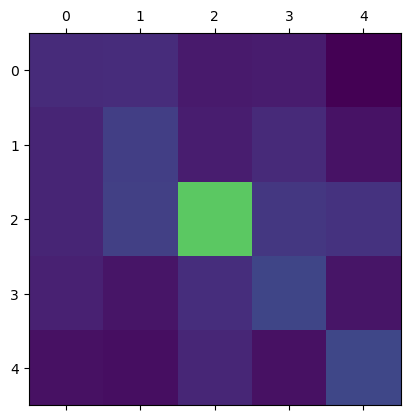

In [86]:
plt.matshow(CCM.PairwiseCCM().compute(np.transpose(unmixed,axes=(1,0,2)),np.transpose(unmixed,axes=(1,0,2)),1500,400,60,30,60).mean(axis=0),vmax=1)

In [87]:
import plotly.express as px
x_pca = PCA(3).fit_transform(unmixed[:,2,:])
fig = px.line_3d(x=x_pca[:,0], y=x_pca[:,1],z=x_pca[:,2],height=700)

fig.show()

In [13]:
[utils.calculate_rank_for_variance(unmixed[np.random.randint(0,unmixed.shape[0],5000),i],0.95) for i in range(unmixed.shape[1])]


[13, 12, 13, 12, 9]

In [119]:
[utils.calculate_correlation_dimension(unmixed[np.random.randint(0,unmixed.shape[0],1000),i],device="cuda") for i in range(unmixed.shape[1])]

[3.2952017784118652,
 2.6269819736480713,
 3.3278446197509766,
 3.1324431896209717,
 2.9215168952941895]